# REPORT: Fast Fourier Transform

**_Nguyen Thanh Danh - 17520324_** <br>
**_KHTN2017_** <br>
**_Multi-media Computing_** <br>

# 1. Import Libraries

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt

# 2. Initiation:

In [2]:
#Sampling Frequency
Fs = 1000
#Length of signal
L = 1500
#Sample period
T = 1/Fs
#Time vector
t = np.linspace(0, L*T, L)

A1 = 0.7
A2 = 1
f1 = 50
f2 = 120

# 3. Forming signals and noises:

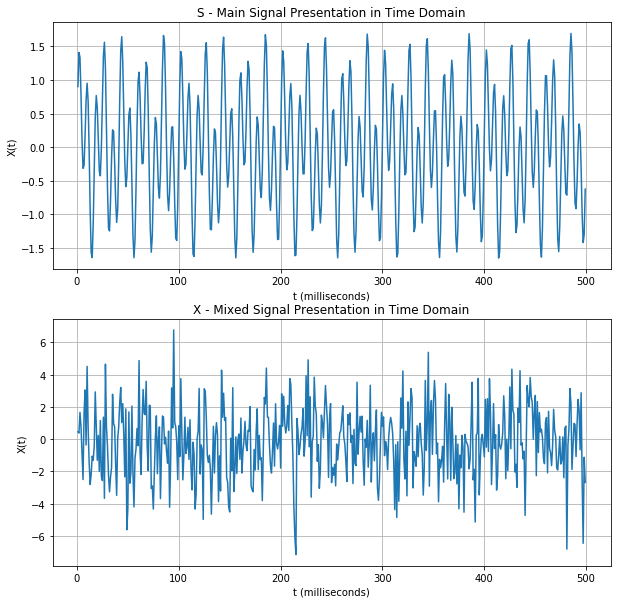

In [3]:
S = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)
X = S + 2 * np.random.randn(len(t))

plt.figure(figsize = (10,10))

plt.subplot(211)
plt.plot(Fs*t[1:500], S[1:500])
plt.title('S - Main Signal Presentation in Time Domain')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')
plt.grid()

plt.subplot(212)
plt.plot(Fs*t[1:500], X[1:500])
plt.title('X - Mixed Signal Presentation in Time Domain')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')
plt.grid()
plt.show()

# 4. Using FFT to transfer mixed-signals into frequency domain:

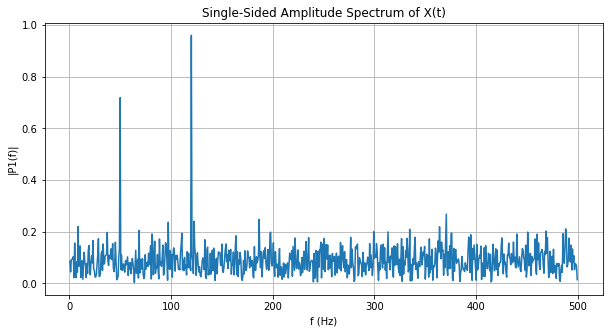

In [4]:
Xf = fft(X)

# Compute the two-sided spectrum P2.
# Then compute the single-sided spectrum P1 based on P2 and the even-valued signal length L.
P2 = abs(Xf/L)
P1 = [None] * (len(P2)//2)
for i in range(len(P2)//2):
    P1[i] = P2[i]
for i in range(2,len(P1)-1):
    P1[i] = 2 * P1[i]

# Define the frequency domain f and plot the single-sided amplitude spectrum P1. 
# The amplitudes are not exactly at 0.7 and 1, as expected, because of the added noise. 
# On average, longer signals produce better frequency approximations.
f = [None] * (L//2)
for i in range(1,L//2):
    f[i] = Fs*i/L

plt.figure(figsize = (10,5))
plt.plot(f,P1)
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.grid()
plt.show()

# 5. Using FFT to transfer main-signals into frequency domain:

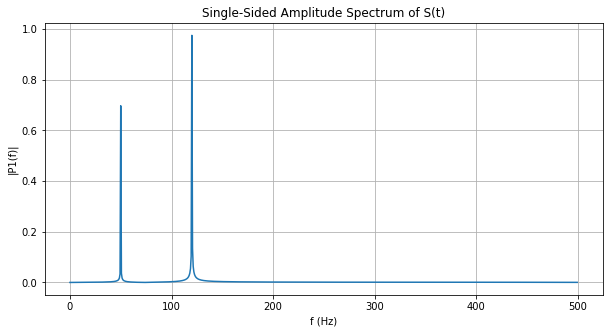

In [5]:
Sf = fft(S)

P2 = abs(Sf/L)
P1 = [None] * (len(P2)//2)
for i in range(len(P2)//2):
    P1[i] = P2[i]
for i in range(len(P1)-1):
    P1[i] = 2 * P1[i]

f = [None] * (L//2)
for i in range(L//2):
    f[i] = Fs*i/L

plt.figure(figsize = (10,5))
plt.plot(f,P1)
plt.title('Single-Sided Amplitude Spectrum of S(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.grid()
plt.show()

# 6. Inverse Fast Fourier Transform:
### (Invert back to main-signals and noise-signal)

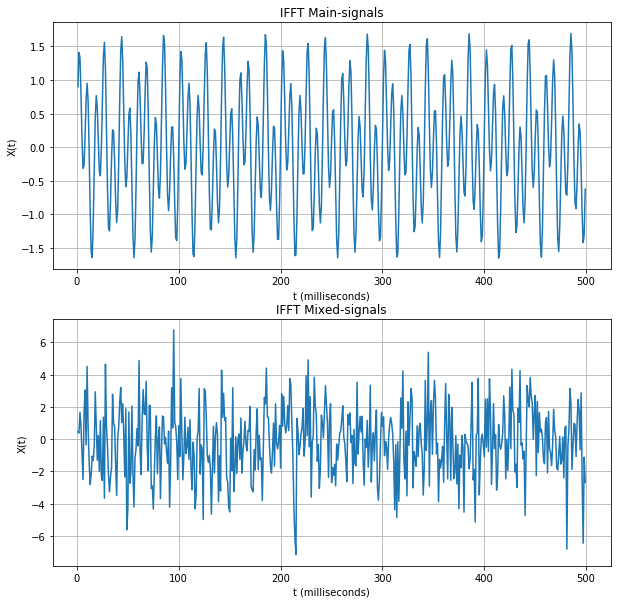

In [6]:
Z_main = ifft(Sf) # an arr of complex number, includes real part and imag part
Z_mixed = ifft(Xf)

plt.figure(figsize = (10,10))

plt.subplot(211)
plt.plot(Fs*t[1:500], Z_main[1:500].real)
plt.title('IFFT Main-signals')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')
plt.grid()

plt.subplot(212)
plt.plot(Fs*t[1:500], Z_mixed[1:500].real)
plt.title('IFFT Mixed-signals')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')
plt.grid()
plt.show()


## Drafts:

In [20]:
# N = 1500
# from scipy.fftpack import fft, fftfreq, fftshift
# import matplotlib.pyplot as plt

# x = np.linspace(0, N*T, N)
# y = 0.7 * np.exp(50 * 1.j * 2 * np.pi * x) + np.exp(120 * 1.j * 2 * np.pi * x) + np.random.randn(len(t))

# yf = fft(y)
# xf = fftfreq(N, T)
# xf = fftshift(xf)
# yplot = fftshift(yf)

# plt.plot(xf, 1.0/N * np.abs(yplot))
# plt.grid()
# plt.show()

In [23]:
# from scipy.signal import blackman
# N = 1500
# # S = 0.7 * np.sin(2 * 2000 * np.pi * t) + np.sin(2 * 1200 * np.pi * t)
# # yf = fft(y)

# w = np.blackman(N)
# # ywf = fft(y*w)
# # xf = np.linspace(0, 1/(2*T), N//2)

# X = 2 * np.random.randn(len(t))

# Y = fft(X)
# Ywf = fft(X*w)
# Sf = np.linspace(0, 1/(2*T), N//2)
# plt.semilogy(Sf[1:N//2], 2/N * np.abs(Ywf[1:N//2]), '-r')

# # plt.semilogy(xf[1:N//2], 2/N * np.abs(yf[1:N//2]), '-b')
# # plt.semilogy(xf[1:N//2], 2/N * np.abs(ywf[1:N//2]), '-r')
# plt.legend(['FFT', 'FFT w. window'])
# plt.xlabel('f (Hz)')
# plt.ylabel('|P1(f)|')

# plt.grid()
# plt.show()